## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn import datasets
import random

# Study data files
mouse_metadata_path = "./Resources/mouse_data.csv"
study_results_path = "./Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_id = combined_data["Mouse ID"].unique()
mice_count = len(mice_id)
pd.DataFrame([{"Mouse Count": mice_count}])

,Mouse Count
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

cleaned_data = combined_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = "first")
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_group = combined_data.groupby("Mouse ID")
combined_size = combined_group.size()
clean_group = cleaned_data.groupby("Mouse ID")
clean_size = clean_group.size()
full_group = pd.DataFrame({"Unclean Data": combined_size, "Clean Data": clean_size})
duplicate_data = full_group.loc[full_group["Unclean Data"] != full_group["Clean Data"], :]

dropped_mouse = combined_data.loc[combined_data["Mouse ID"] == duplicate_data.index[0]]

dropped_data = []

for x in dropped_mouse.index:
    if x == 920:
        print()
    elif dropped_mouse.loc[x, "Timepoint"] == dropped_mouse.loc[(x+1), "Timepoint"]:
        dropped_data.append(dropped_mouse.loc[(x + 1), :])
        
pd.DataFrame(dropped_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(cleaned_data["Mouse ID"].unique())
pd.DataFrame([{"Mouse Count": mouse_count}])

,Mouse Count
0,249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = cleaned_data.groupby("Drug Regimen")
tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()
tumor_med = regimen_group["Tumor Volume (mm3)"].median()
tumor_var = regimen_group["Tumor Volume (mm3)"].var()
tumor_std = regimen_group["Tumor Volume (mm3)"].std()
tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()

tumor_merge1 = pd.merge(tumor_mean, tumor_med, on="Drug Regimen")
tumor_merge2 = pd.merge(tumor_var, tumor_std, on="Drug Regimen")
tumor_merge3 = pd.merge(tumor_merge1, tumor_merge2, on="Drug Regimen")
tumor_merge = pd.merge(tumor_merge3, tumor_sem, on="Drug Regimen")
tumor_stats = tumor_merge.rename(columns={"Tumor Volume (mm3)_x_x": "Average Tumor Volume",
                                          "Tumor Volume (mm3)_y_x": "Median Tumor Volume",
                                          "Tumor Volume (mm3)_x_y": "Tumor Variance",
                                          "Tumor Volume (mm3)_y_y": "Tumor Standard Deviation",
                                          "Tumor Volume (mm3)": "Tumor Standard Error"})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats

,Average Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Standard Deviation,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = regimen_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumor_stats_2 = tumor_agg.rename(columns={"mean": "Average Tumor Volume",
                                          "median": "Median Tumor Volume",
                                          "var": "Tumor Variance",
                                          "std": "Tumor Standard Deviation",
                                          "sem": "Tumor Standard Error"})
tumor_stats_2

Tumor Volume (mm3)                                     \
             Average Tumor Volume Median Tumor Volume Tumor Variance   
Drug Regimen                                                           
Capomulin               40.675741           41.557809      24.947764   
Ceftamin                52.591172           51.776157      39.290177   
Infubinol               52.884795           51.820584      43.128684   
Ketapril                55.235638           53.698743      68.553577   
Naftisol                54.331565           52.509285      66.173479   
Placebo                 54.033581           52.288934      61.168083   
Propriva                52.393463           50.909965      43.138803   
Ramicane                40.216745           40.673236      23.486704   
Stelasyn                54.233149           52.431737      59.450562   
Zoniferol               53.236507           51.818479      48.533355   

                                                            
             Tumor Standard Deviation Tumor Standard Error  
Drug Regimen                                                
Capomulin                    4.994774             0.329346  
Ceftamin                     6.268188             0.469821  
Infubinol                    6.567243             0.492236  
Ketapril                     8.279709             0.603860  
Naftisol                     8.134708             0.596466  
Placebo                      7.821003             0.581331  
Propriva                     6.568014             0.525862  
Ramicane                     4.846308             0.320955  
Stelasyn                     7.710419             0.573111  
Zoniferol                    6.966589             0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Drug Regimen Measurements')

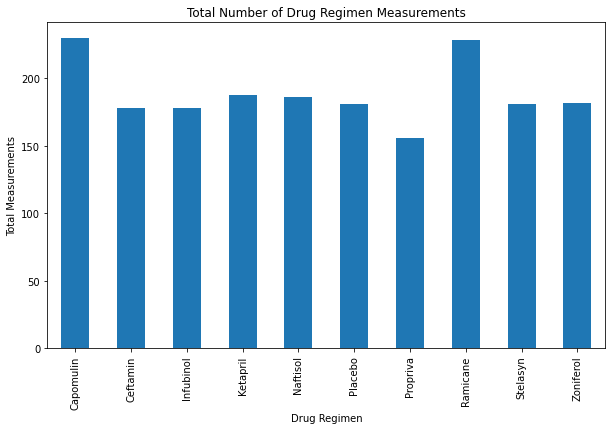

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

plt.figure(figsize=(10, 6))
regimen_group.size().plot(kind="bar")

plt.ylabel("Total Measurements")
plt.title("Total Number of Drug Regimen Measurements")

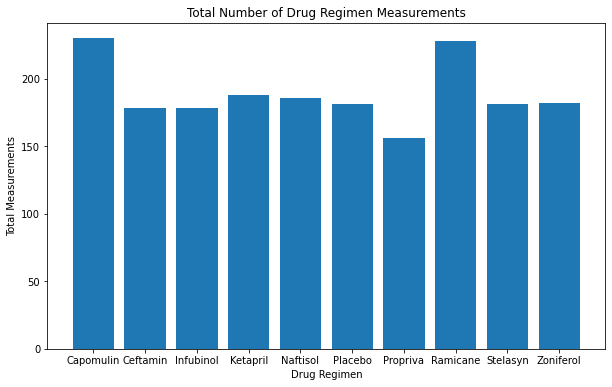

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

regimen_count = regimen_group.size()
regimen = regimen_count.index
x_axis = np.arange(len(regimen_count))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, regimen_count)

tick_location = [value for value in x_axis]
plt.xticks(tick_location, regimen)

plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.title("Total Number of Drug Regimen Measurements")
plt.show()

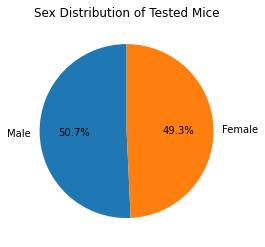

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_group = cleaned_data["Sex"].value_counts()
sex_labels = ["Male", "Female"]

sex_group.plot(kind="pie", autopct="%1.1f%%", startangle=90)

plt.title("Sex Distribution of Tested Mice")
plt.ylabel("")
plt.show()

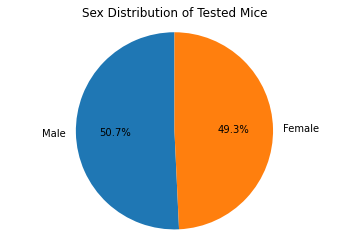

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_group, labels=sex_labels, autopct="%1.1f%%", startangle=90)
plt.axis("equal")

plt.title("Sex Distribution of Tested Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_mouse = pd.DataFrame(clean_group["Timepoint"].last())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_data = pd.merge(last_mouse, cleaned_data, how='left', on=['Mouse ID', 'Timepoint'])
last_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

treat_record = []
last_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for x in last_data.index:
    if last_data.iloc[x,2] in treatments:
        treat_record.append(x)
        last_tumor.append(last_data.iloc[x,6])

last_regimen = last_data.iloc[treat_record,:]
    
    # add subset 

last_group = last_regimen.groupby("Drug Regimen")
last_Q1 = last_group["Tumor Volume (mm3)"].quantile(0.25)
last_Q3 = last_group["Tumor Volume (mm3)"].quantile(0.75)
last_IQR = last_Q3 - last_Q1

outlier_index = []

for x in treatments:
    for y in last_regimen.index:
        if last_regimen.loc[y,"Drug Regimen"] == x:
            if last_regimen.loc[y, "Tumor Volume (mm3)"] < (last_Q1[x] - last_IQR[x] * 1.5):
                outlier_index.append(y)
            elif last_regimen.loc[y, "Tumor Volume (mm3)"] > (last_Q3[x] + last_IQR[x] * 1.5):
                outlier_index.append(y)

# Determine outliers using upper and lower bounds
last_regimen = last_regimen.drop(outlier_index)

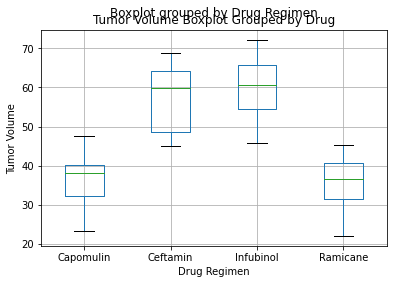

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

last_box = last_regimen[["Drug Regimen", "Tumor Volume (mm3)"]]
last_box.boxplot(by="Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume Boxplot Grouped by Drug")

plt.show()

## Line and Scatter Plots

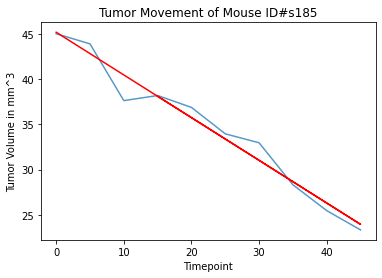

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin", :]
cap_mice = capomulin_data["Mouse ID"].unique()
random_mouse = random.choice(cap_mice)
cap_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == random_mouse, :]

plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], alpha=.75)

(slope, intercept, r, p, std) = st.linregress(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
regress_values = capomulin_data["Timepoint"] * slope + intercept
plt.plot(capomulin_data["Timepoint"],regress_values,"r-")

plt.title(f"Tumor Movement of Mouse ID#{random_mouse}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume in mm^3")
plt.show()

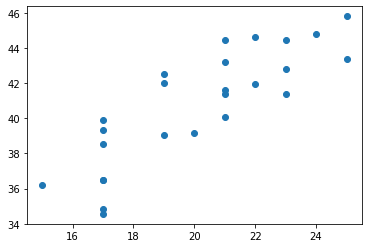

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_mouse = capomulin_data.groupby("Mouse ID")
mouse_weight = cap_mouse["Weight (g)"].first()
mouse_tumor = cap_mouse["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, mouse_tumor)

## Correlation and Regression

y = 0.95x + 21.55
R = 0.8419363424694718


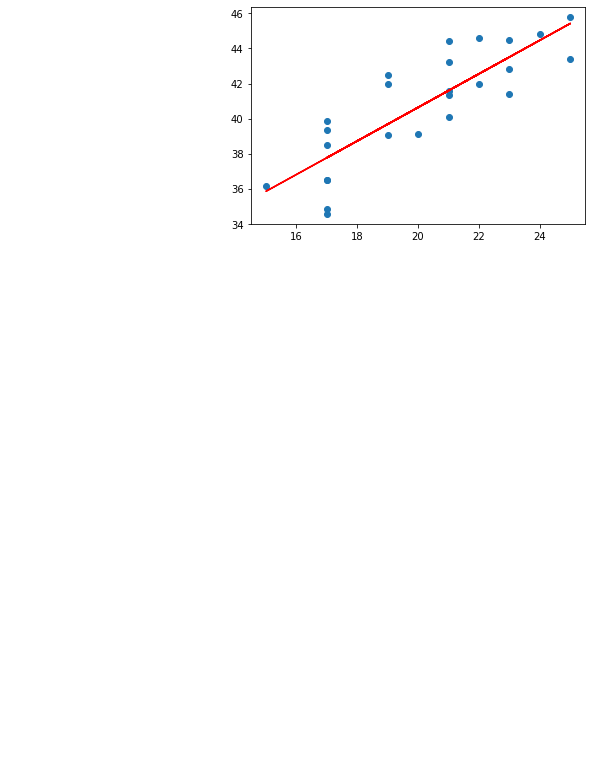

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, r, p, std) = st.linregress(mouse_weight, mouse_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, mouse_tumor)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(6.5,4),fontsize=15,color="blue")


print(line_eq)
print(f"R = {r}")

plt.show()